170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 0.6184 - val_loss: 0.5790
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.5745 - val_loss: 0.5710
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5699 - val_loss: 0.5710
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.5674 - val_loss: 0.5667
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5653 - val_loss: 0.5646
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5639 - val_loss: 0.5685
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.5637 - val_loss: 0.5626
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5616 - val_loss: 0.5621
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5608 - val_loss: 0.5621
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5613 - val_loss: 0.5612
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.5607 - val

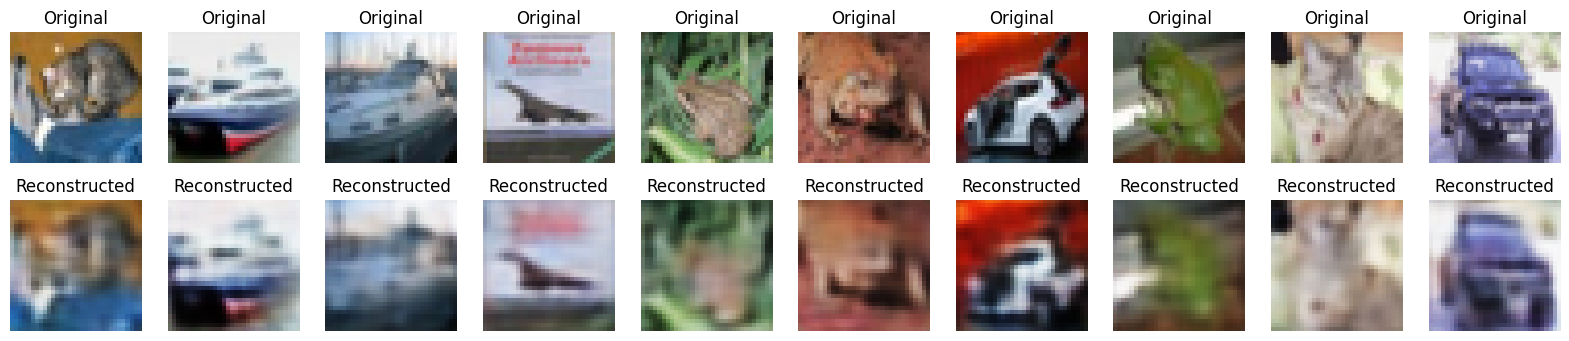

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import cifar10

#Load and Preprocess CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Define the Autoencoder for RGB Images
input_img = keras.Input(shape=(32, 32, 3))

#Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)   # 32x32x32
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # 16x16x32
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # 16x16x64
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # 8x8x64
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)          # 8x8x128
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)                       # 4x4x128

#Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)    # 4x4x128
x = layers.UpSampling2D((2, 2))(x)                                             # 8x8x128
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # 8x8x64
x = layers.UpSampling2D((2, 2))(x)                                             # 16x16x64
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)           # 16x16x32
x = layers.UpSampling2D((2, 2))(x)                                             # 32x32x32
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)   # 32x32x3

#Build and Compile Model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Train the Autoencoder
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

#Predict on test images
decoded_imgs = autoencoder.predict(x_test)

#Visualize the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    #Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
